<a href="https://colab.research.google.com/github/FranciscoNav/springboard/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree Using scikit learn**

---

In [24]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Load the dataset
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['target'] = iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
# Note one benefit of decision trees is that you don't have to standarize your features unlike other algorithms like logistic regression and k-nearest neighbors
x_train, x_test, y_train, y_test= train_test_split(iris_df[iris_data.feature_names], iris_df['target'], random_state=0)

In [27]:
# Make an instance of the model
# the code below constrains the model to have at most a depth of 2. Tree depth is a measure of how many splits it makes before coming to prediction. Tree depth is equal to how many split it makes before coming to a decision
clf = DecisionTreeClassifier(max_depth=2, random_state=0)

# Train the model
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [28]:
# Predict the labels of new data (new flowers) for one observation
clf.predict(x_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [31]:
# Predict for multiple observations
clf.predict(x_test[0:10])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1])

In [32]:
# Measure model performance
# Accuracy is defined as:(fraction of correct predictions): correct predictions/total number of data points
score= clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [33]:
# Finding the optimal max_depth

# list of values to try for max_depth:
max_depth_range = list(range(1,6))

# list to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
  clf = DecisionTreeClassifier(max_depth= depth, random_state = 0)
  clf.fit(x_train, y_train)
  score = clf.score(x_test, y_test)
  accuracy.append(score)

print(accuracy)

[0.5789473684210527, 0.8947368421052632, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


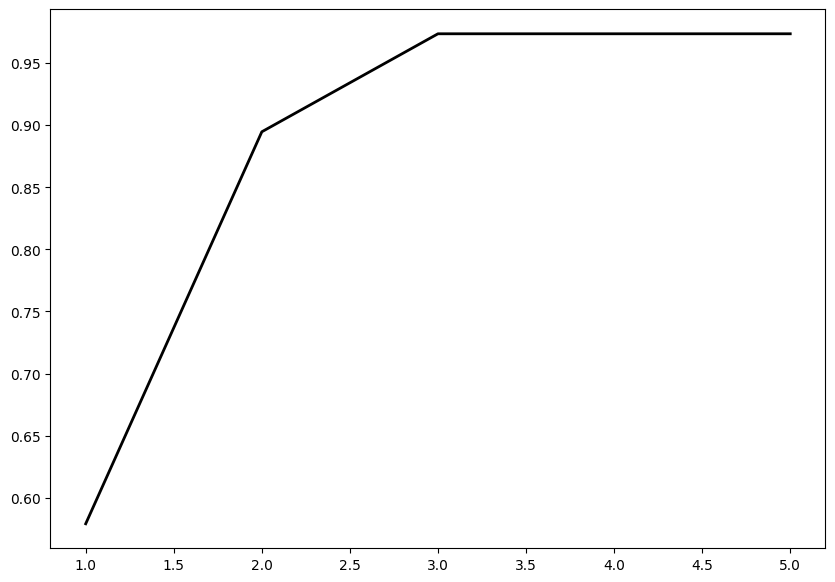

In [34]:
# visualize optimal max_depth
fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (10,7))
ax.plot(max_depth_range, accuracy, lw=2, color='k')

# **How to visualize Decision trees using Matplotlib**

---



In [35]:
# Import additional libraries
from sklearn import tree

[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

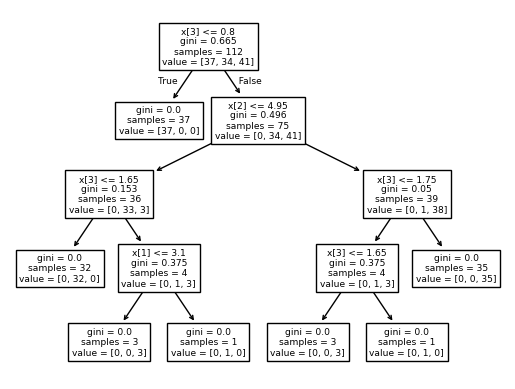

In [41]:
# defualt visualization based on Model
tree.plot_tree(clf)

[Text(0.4, 0.9, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'petal width (cm) <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(0.7, 0.3, 'petal width (cm) <= 1.65\ngini = 0

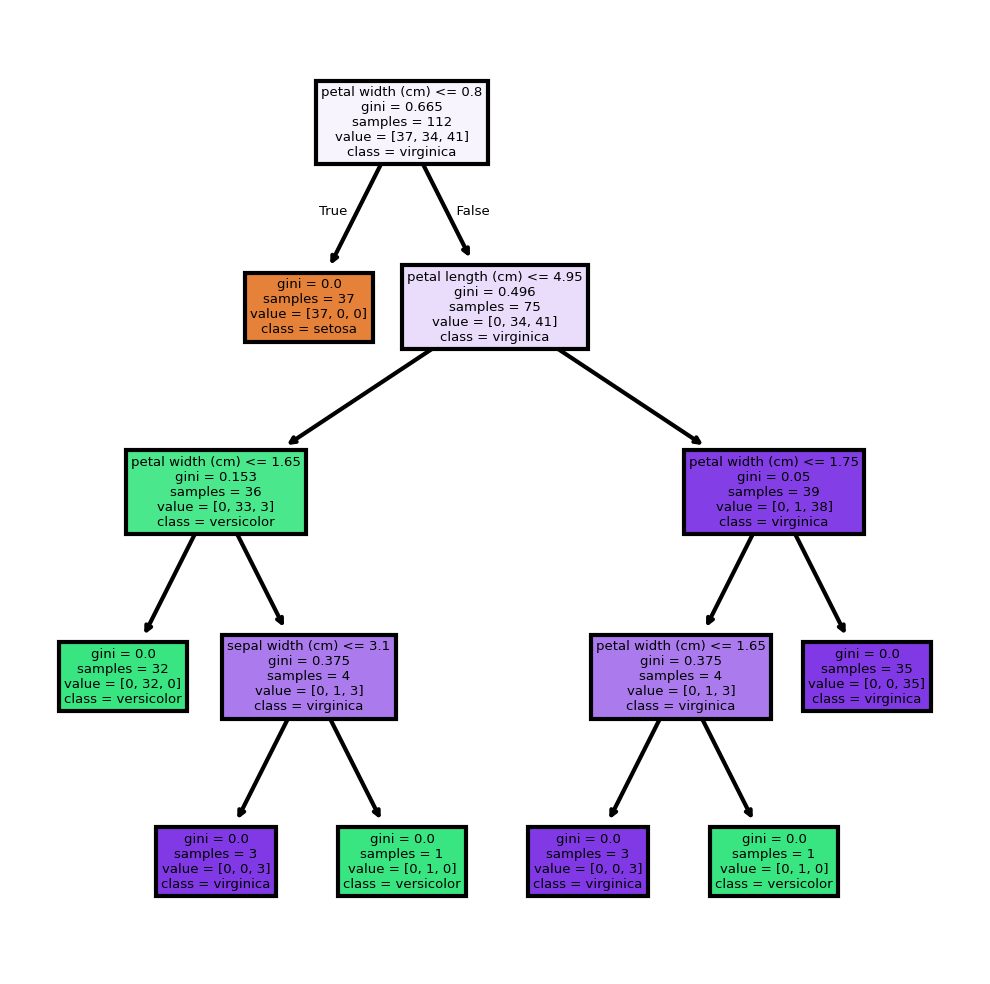

In [42]:
# Make it more interpretable

# Putting the feature names and class names into variables
fn = ['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)']
cn = ['setosa','versicolor','virginica']

fig, ax = plt.subplots(nrows= 1, ncols = 1, figsize = (4,4), dpi=300)

tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)


# **Bagged Trees Using Scikit Learn**

---



In [44]:
# Import additional libraries
import numpy as np
from sklearn.ensemble import BaggingRegressor

In [45]:
df = pd.read_csv('/content/sample_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [47]:
# selecting only a couple of features for simplicity
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']

x = df.loc[:, features]
y = df.loc[:, 'price'].values

In [48]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=0)

In [51]:
# Make instance of the model
# note n_estimators is how many decision tree are coming together to make a prediction
reg = BaggingRegressor(n_estimators=100, random_state=0)

reg.fit(x_train, y_train)

BaggingRegressor(n_estimators=100, random_state=0)

In [52]:
# Make predictions
# predict for one observation
reg.predict(x_test.iloc[0].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but BaggingRegressor was fitted with feature names
  warnings.warn(


array([353334.6])

In [53]:
# predic multiple observations
reg.predict(x_test[0:10])

array([ 353334.6 , 1011004.77,  450212.76,  418593.  ,  772871.7 ,
        405436.5 ,  361353.02,  720323.9 ,  580438.82, 1623570.8 ])